In [1]:
%autosave 120

Autosaving every 120 seconds


In [6]:
import torch
import matplotlib.pyplot as plt 
from scipy.stats import norm
from matplotlib.offsetbox import AnchoredText
from matplotlib.gridspec import GridSpec

#GPU
device = 'cpu'
print(f"Using {device} device")
# W_dist, targets = torch.load('/home/gbortolai/Thesis/data/MNIST/Wasserstein_dist_test_eq_s=1500', map_location = device)
# W_dist, targets = torch.load('/home/gbortolai/Thesis/data/MNIST/Wasserstein_dist_train_eq_s=3000', map_location = device)
# W_dist, targets = torch.load('/home/gbortolai/Thesis/data/MNIST/E_dist_FCFF_2W_s=1500', map_location = device)
# W_dist, targets = torch.load('/home/gbortolai/Thesis/data/MNIST/E_dist_CNN-paper_s=1500', map_location = device)
# W_dist, targets = torch.load('/data/gabrieleb/data/Jets/E_dist_emb_transformer_s=4000', map_location = device)
# W_dist, targets = torch.load('/home/gbortolai/Thesis/data/Jets/Wasserstein_dist_test_s=4000', map_location = device)
# W_dist, targets = torch.load('/data/gabrieleb/data/Jets/Wasserstein_dist_test_real_s=4000', map_location = device)
# W_dist, targets = torch.load('/data/gabrieleb/data/Jets/E_dist_real_emb_transformer_s=4000', map_location = device)
# W_dist, targets = torch.load('/home/gbortolai/Thesis/data/Jets/Sliced_Wasserstein_dist_validation_simple_s=2400', map_location = device)
W_dist, targets = torch.load('/data/gabrieleb/data/Jets/E_dist_real_emb_transformer_sim_4D_s=4000', map_location = device)

Using cpu device


In [2]:
def P_value(H0, t1):
    
    if t1 <= torch.max(H0):
        p_value = torch.count_nonzero(H0 >= t1)/torch.tensor(H0.size())

    if t1 > torch.max(H0):
        p_value = 1/torch.tensor(H0.size())
        
    return p_value        

def Z_score(p_value):
    return norm.ppf(1-p_value)

In [ ]:
# H = [0,1,2,3,4,5,6,7,8,9]
# H = [1,2]
H = [1,2,3,4]

W0, W1 = [], []
plot = []
label =[]

number = []

title = 'Simple Jets'
xtitle = 'Wasserstein distance'
ytitle = 'Density'

bins = "auto"

for H0 in H:
    for H1 in filter(lambda h: h != H0, H):
        fig, ax = plt.subplots(figsize = (7,7))
        ax.set_title(title, fontsize = 20)
        ax.set_xlabel(xtitle, fontsize = 15)
        ax.set_ylabel(ytitle, fontsize = 15)
        ax.tick_params(axis='both', which='major', labelsize=12)
        # ax.set_ylim(0,30)
        # ax.set_xlim(0,0.2)
        
        lab1 = str(H0)+'-'+str(H0)
        lab2 = str(H0)+'-'+str(H1)

        for i in torch.nonzero(targets == H0, as_tuple = False)[:,0]:
            for j in torch.nonzero(targets == H0, as_tuple = False)[:,0]:
                if W_dist[i][j] != 0:
                    W0.append(W_dist[i][j].item())

        ax.hist(W0, bins = bins, density = True, linewidth = 0.8, alpha = 0.5)

        for i in torch.nonzero(targets == H0, as_tuple = False)[:,0]:
            for j in torch.nonzero(targets == H1, as_tuple = False)[:,0]:
                if W_dist[i][j] != 0:
                    W1.append(W_dist[i][j].item())

        ax.hist(W1, bins = bins, density = True, linewidth = 0.8, alpha = 0.5)
        ax.legend([lab1, lab2], loc = 'upper right', fontsize = 12, edgecolor = 'black', bbox_to_anchor=(0.98, 1), bbox_transform=ax.transAxes)
        median = torch.median(torch.tensor(W1))

        p_value = P_value(torch.tensor(W0), median)
        z_score = Z_score(p_value)
        
        number.append([lab2, p_value.item(), z_score.item()])
        
        anchored_text = AnchoredText('p-value:'+str('%.2f' % p_value.item())+'\nZ:'+str('%.2f' % z_score.item()), loc='upper right', bbox_to_anchor = (1,0.89), bbox_transform=ax.transAxes)
        ax.add_artist(anchored_text)
        
        ax.axvline(x = median.item(), color='red', linestyle='dashed')
        
        fig.savefig('/home/gbortolai/Thesis/Plot/Jets/Simple/W_dist/W_dist'+str([H0, H1])+'.pdf', facecolor='w',pad_inches=0.3, transparent=True)
        
        plt.show()
        W0, W1 = [], []
# torch.save(number,'/home/gbortolai/Thesis/data/MNIST/p_value_z_score_2W_test_eq')
number = []

In [17]:
H0 = 1
H0 = 2

W1 = []

for i in torch.nonzero(targets == H0, as_tuple = False)[:,0]:
        for j in torch.nonzero(targets == H1, as_tuple = False)[:,0]:
            if W_dist[i][j] != 0:
                W1.append(W_dist[i][j].item())


In [26]:
value = torch.load('/home/gbortolai/Thesis/data/MNIST/p_value_z_score_2W_test_eq', map_location = device)
# value = torch.load('/home/gbortolai/Thesis/data/Jets/p_value_z_score_test', map_location = device)
value_emb = torch.load('/home/gbortolai/Thesis/data/MNIST/p_value_z_score_2W_test_eq_CNN-paper', map_location = device)
# value_emb = torch.load('/home/gbortolai/Thesis/data/Jets/p_value_z_score_transformer', map_location = device)

p_v_emb, z_score_emb = [], []
p_v, z_score = [], []

for i in range(len(value_emb)):
    p_v_emb.append(value_emb[i][1])
    z_score_emb.append(value_emb[i][2])
    
    p_v.append(value[i][1])
    z_score.append(value[i][2])

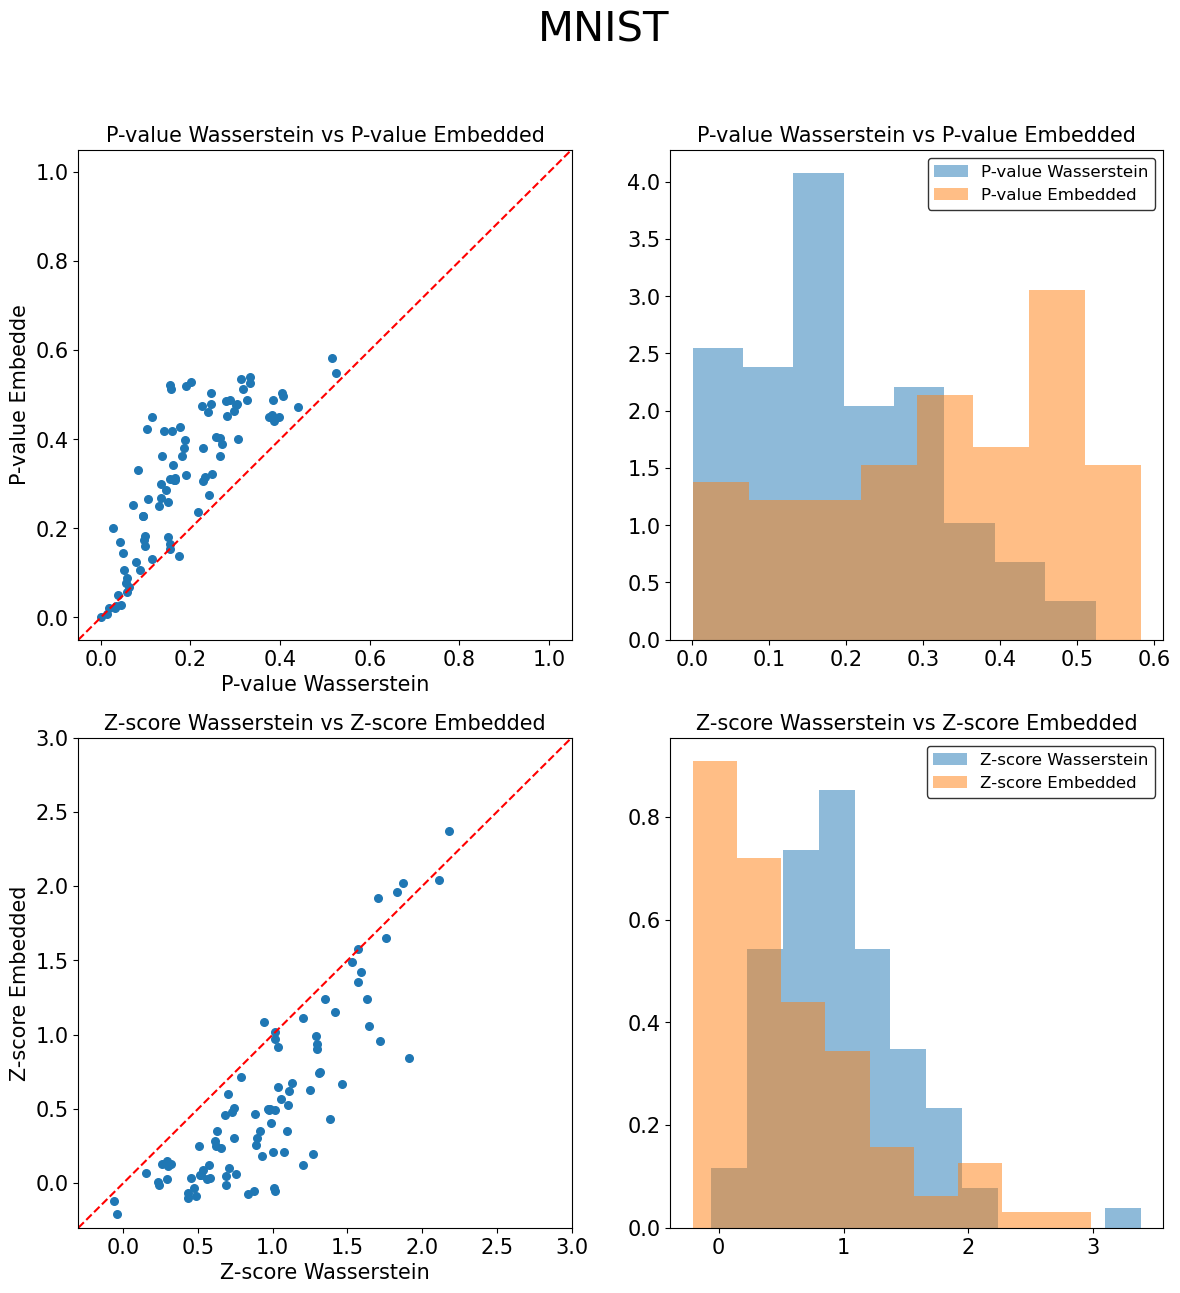

In [29]:
fig = plt.figure(figsize = (14, 14), constrained_layout=False)
fig.suptitle('MNIST', fontsize = 30)

gs = GridSpec(2, 2, figure = fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('P-value Wasserstein vs P-value Embedded', fontsize = 15)
ax1.set_xlabel('P-value Wasserstein', fontsize = 15)
ax1.set_ylabel('P-value Embedde', fontsize = 15)
# ax1.set_xlim(-0.01, 0.6)
# ax1.set_ylim(-0.01, 0.6)
ax1.axline((0,0), (1,1), color = 'r', linestyle = 'dashed')
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.scatter(p_v, p_v_emb, s = 30)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('P-value Wasserstein vs P-value Embedded', fontsize = 15)
#ax2.set_xlabel('p-value')
#ax2.set_ylabel('p-value embedding')

ax2.hist(p_v, bins = 'auto', density = True, alpha = 0.5, linewidth = 0.8, label = 'P-value Wasserstein')
ax2.hist(p_v_emb, bins = 'auto', density = True, alpha = 0.5, linewidth = 0.8, label = 'P-value Embedded')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.legend(loc = 'best', fontsize = 12, edgecolor = 'black')

ax3 = fig.add_subplot(gs[1, 0])
ax3.set_title('Z-score Wasserstein vs Z-score Embedded', fontsize = 15)
ax3.set_xlabel('Z-score Wasserstein', fontsize = 15)
ax3.set_ylabel('Z-score Embedded', fontsize = 15)
ax3.set_xlim(-0.3, 3)
ax3.set_ylim(-0.3, 3)
ax3.axline((0,0), (1,1), color = 'r', linestyle = 'dashed')
ax3.tick_params(axis='both', which='major', labelsize=15)

ax3.scatter(z_score, z_score_emb, s = 30)

ax4 = fig.add_subplot(gs[1, 1])
ax4.set_title('Z-score Wasserstein vs Z-score Embedded', fontsize = 15)
#ax2.set_xlabel('z-score')
#ax2.set_ylabel('z-score embedding')

ax4.hist(z_score, bins = 'auto', density = True, alpha = 0.5, linewidth = 0.8, label = 'Z-score Wasserstein')
ax4.hist(z_score_emb, bins = 'auto', density = True, alpha = 0.5, linewidth = 0.8, label = 'Z-score Embedded')
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.legend(loc = 'best', fontsize = 12, edgecolor = 'black')

fig.savefig('/home/gbortolai/Thesis/Plot/MNIST/p_value_z_score_CNN-paper.pdf', facecolor='w',pad_inches=0.3, transparent=True)

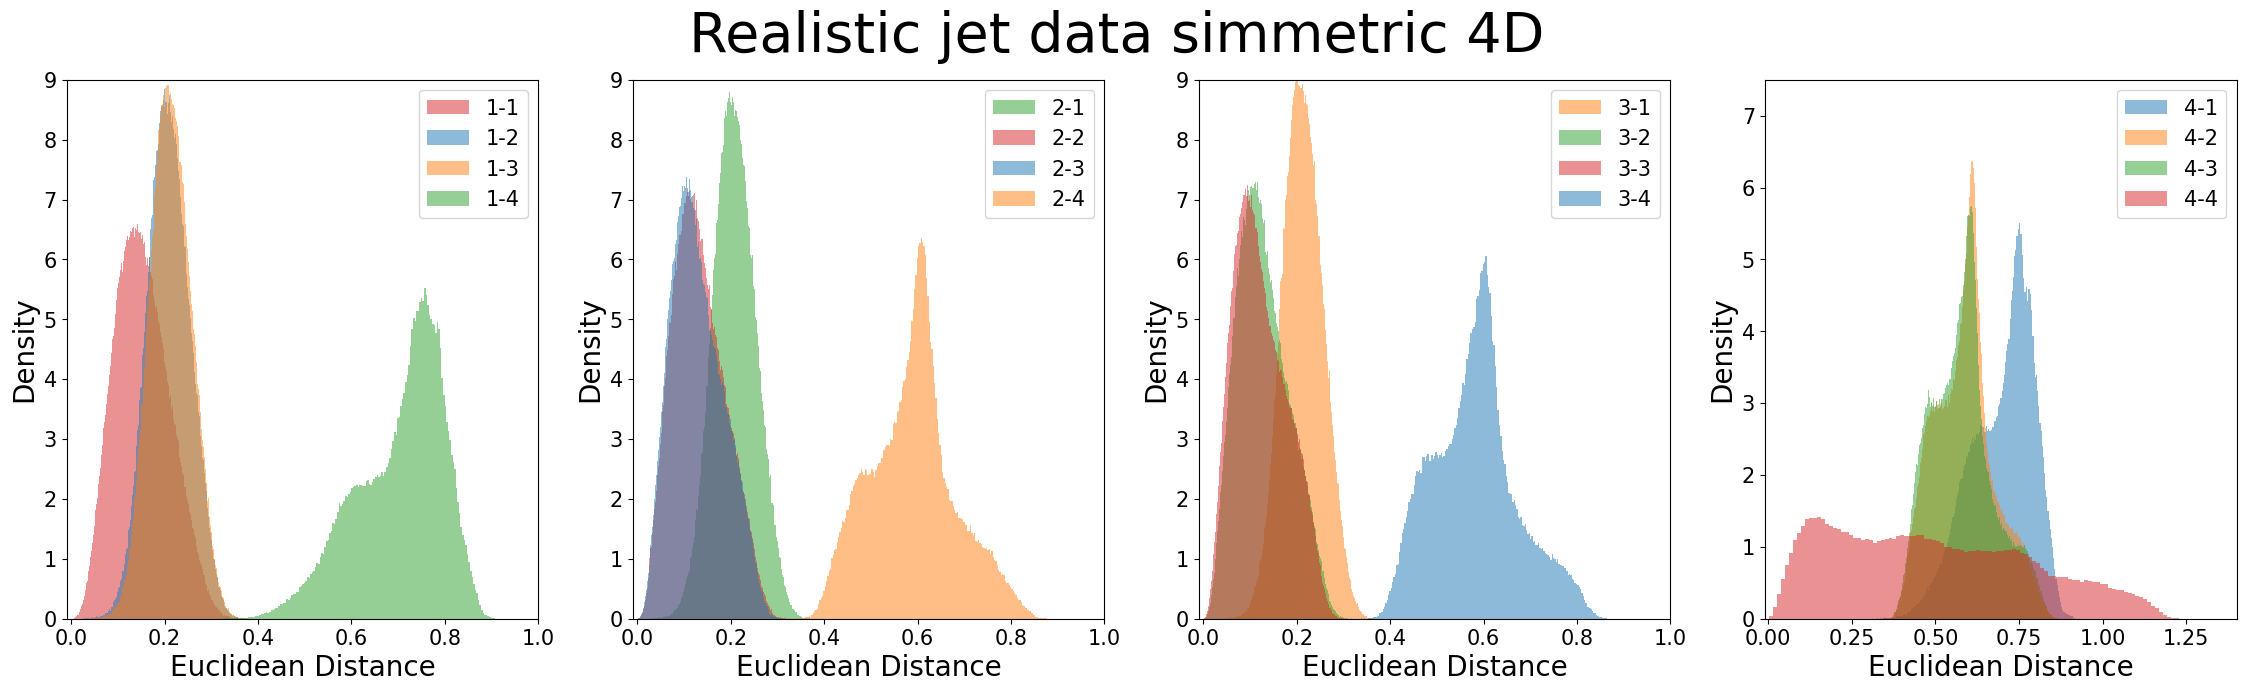

In [9]:
fig2, ax2 = plt.subplots(1,4,figsize = (28,7))

title = ''
# xtitle = '2-Wasserstein Distance'
# xtitle = '1-Wasserstein Distance'
xtitle = 'Euclidean Distance'
# xtitle = 'Sliced Wasserstein Distance'
ytitle = 'Density'

fig2.suptitle('Realistic jet data simmetric 4D', fontsize = 40)

ax2[0].set_title(title, fontsize = 20)
ax2[0].set_xlabel(xtitle, fontsize = 20)
ax2[0].set_ylabel(ytitle, fontsize = 20)
ax2[0].tick_params(axis='both', which='major', labelsize=15)
ax2[0].set_xlim(-0.01, 1)
ax2[0].set_ylim(0, 9)

ax2[1].set_title(title, fontsize = 20)
ax2[1].set_xlabel(xtitle, fontsize = 20)
ax2[1].set_ylabel(ytitle, fontsize = 20)
ax2[1].tick_params(axis='both', which='major', labelsize=15)
ax2[1].set_xlim(-0.01, 1)
ax2[1].set_ylim(0, 9)

ax2[2].set_title(title, fontsize = 20)
ax2[2].set_xlabel(xtitle, fontsize = 20)
ax2[2].set_ylabel(ytitle, fontsize = 20)
ax2[2].tick_params(axis='both', which='major', labelsize=15)
ax2[2].set_xlim(-0.01, 1)
ax2[2].set_ylim(0, 9)

ax2[3].set_title(title, fontsize = 20)
ax2[3].set_xlabel(xtitle, fontsize = 20)
ax2[3].set_ylabel(ytitle, fontsize = 20)
ax2[3].tick_params(axis='both', which='major', labelsize=15)
ax2[3].set_xlim(-0.01, 1.4)
ax2[3].set_ylim(0, 7.5)

labels = [['1-1','1-2','1-3', '1-4'],['2-1','2-2','2-3', '2-4'],['3-1','3-2','3-3', '3-4'], ['4-1','4-2','4-3', '4-4']]#jets
# labels = [['0-0','0-1','0-5'],['1-1','1-7','1-9'],['3-2','3-3','3-4'], ['5-5','5-7','5-9']]

color_1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
color_2 = ['#d62728', '#1f77b4', '#ff7f0e', '#2ca02c']
color_3 = ['#2ca02c', '#d62728', '#1f77b4','#ff7f0e']
color_4 = ['#ff7f0e', '#2ca02c', '#d62728', '#1f77b4']

# color_1 = ['#1f77b4', '#ff7f0e', '#2ca02c']
# color_2 = ['#1f77b4', '#ff7f0e', '#2ca02c']
# color_3 = ['#2ca02c', '#1f77b4', '#ff7f0e']
# color_4 = ['#1f77b4', '#ff7f0e', '#2ca02c']

#for l in [0,1,3]:
v = []
l = 0

ind = torch.nonzero(targets == 1)[:,0]
for val in [1,2,3,4]:
    ind_target = torch.nonzero(targets == val)[:,0]
    for i in ind:
        for j in filter(lambda h: h>i, ind_target):
            v.append(W_dist[i][j].item())
    ax2[0].hist(v, bins = 'auto', linewidth = 0.8, alpha = 0.5, density = True, color = color_1[l-1])
    ax2[0].legend(labels[0], fontsize = 15)
    l = l+1

    v = []

l = 0
ind = torch.nonzero(targets == 2)[:,0]
for val in [1,2,3,4]:

    ind_target = torch.nonzero(targets == val)[:,0]
    for i in ind:
        for j in filter(lambda h: h>i, ind_target):
            v.append(W_dist[i][j].item())
    ax2[1].hist(v, bins = 'auto', linewidth = 0.8, alpha = 0.5, density = True, color = color_2[l-1])
    ax2[1].legend(labels[1], fontsize = 15)
    l = l+1

    v =[]

l = 0
ind = torch.nonzero(targets == 3)[:,0]
for val in [1,2,3,4]:
    ind_target = torch.nonzero(targets == val)[:,0]
    for i in ind:
        for j in filter(lambda h: h>i, ind_target):
            v.append(W_dist[i][j].item())
    ax2[2].hist(v, bins = 'auto', linewidth = 0.8, alpha = 0.5, density = True, color = color_3[l-1])
    ax2[2].legend(labels[2], fontsize = 15)
    l = l+1

    v = []
    
l = 0
ind = torch.nonzero(targets == 4)[:,0]
for val in [1,2,3,4]:
    ind_target = torch.nonzero(targets == val)[:,0]
    for i in ind:
        for j in filter(lambda h: h>i, ind_target):
            v.append(W_dist[i][j].item())
    ax2[3].hist(v, bins = 'auto', linewidth = 0.8, alpha = 0.5, density = True, color = color_4[l-1])
    ax2[3].legend(labels[3], fontsize = 15)
    l = l+1

    v = []
del l

In [8]:
fig2.savefig('/home/gabrieleb/Plot/Jets/Real/E_dist_sim_4D.pdf', facecolor='w',pad_inches=0.3, transparent=True, bbox_inches='tight')
# fig2.savefig('/home/gbortolai/Thesis/Plot/MNIST/W_dist_train.pdf', facecolor='w',pad_inches=0.3, transparent=True, bbox_inches='tight')